# 1. VAR Process

In the data `raotb16.csv` we have some macroeconomic data.

1. Test which series Granger cause each other.

2. Test which series are stationary

3. Fit a VAR on the system of time series. Find the best number of lags. Don't forget to differentiate the series that need it.

4. Fit a VAR on everything except the last 12 months (4 quarters) of the data. Backtest your model against the actual last year in the data. Plot the predictions against the data for each series.

# Test which series Granger cause each other.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools 
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
sns.set_theme()


df=pd.read_csv('data/raotb16.csv')
df=df.set_index('date')
df.index=pd.to_datetime(df.index)

Combinations=list(itertools.product(df.columns,df.columns))


matrix=np.zeros([int(len(Combinations)**0.5),int(len(Combinations)**0.5)])
i=0
j=0
it=0
n_lag=6
for (a,b) in Combinations:
    data=df[[a,b]]
    V=grangercausalitytests(data, n_lag,verbose=False)
    p_val=pd.DataFrame(V).T[0].apply(lambda x:x['ssr_chi2test'][1].round(5)).min()
    matrix[i,j]=p_val
    it+=1

    i+=1
    if it%8==0:
        i=0
        j+=1

    #print(F"(x1_{a},'x2_{b})',{p_val}")
p_val_mat=pd.DataFrame(matrix,columns=df.columns+'_x1',index=df.columns+'_x2')

# - 8 because we don't want to include the diagonals 
print(F'Number of p_val >0.05: {(np.array(p_val_mat)>0.05).sum()-8}\nNumber of lag: {n_lag}')
display(p_val_mat)

Number of p_val >0.05: 1
Number of lag: 6


,rgnp_x1,pgnp_x1,ulc_x1,gdfco_x1,gdf_x1,gdfim_x1,gdfcf_x1,gdfce_x1
rgnp_x2,1.00000,0.0,0.00000,0.00000,0.00000,0.00112,0.00000,0.00255
pgnp_x2,0.01055,1.0,0.00000,0.00000,0.00000,0.00672,0.00000,0.04848
ulc_x2,0.00009,0.0,1.00000,0.00000,0.00000,0.00139,0.00078,0.00004
gdfco_x2,0.03599,0.0,0.00018,1.00000,0.00000,0.00827,0.00079,0.00019
gdf_x2,0.00366,0.0,0.00000,0.00000,1.00000,0.00166,0.00000,0.00000
gdfim_x2,0.18456,0.0,0.00000,0.00000,0.00000,1.00000,0.00573,0.00000
gdfcf_x2,0.00162,0.0,0.00000,0.00000,0.00000,0.00485,1.00000,0.00051
gdfce_x2,0.01141,0.0,0.01956,0.00002,0.00224,0.00000,0.00121,1.00000


In [2]:
df

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


In [3]:
data

,gdfce,gdfce
date,,
1959-01-01,23.1,23.1
1959-04-01,23.4,23.4
1959-07-01,23.4,23.4
1959-10-01,23.8,23.8
1960-01-01,23.8,23.8
...,...,...
1988-07-01,92.8,92.8
1988-10-01,92.9,92.9
1989-01-01,94.0,94.0


## result 1.1
With n_lag>=13 we have 0 p values <0.05 and with 

n_lag=6 we have 1 p_value > 0.05 

So we can be confident that they all granger cause eachother with the right n_lag but 
if the number of lag is <13, rgnp_x1 do not granger cause gdfim_x2

# Test which series are stationary


-------------------------
____rgnp____


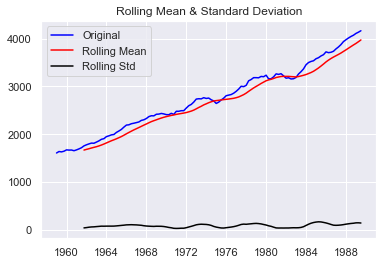

Results of Dickey-Fuller Test:
Test Statistic                   0.641882
p-value                          0.988604
#Lags Used                       2.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____pgnp____


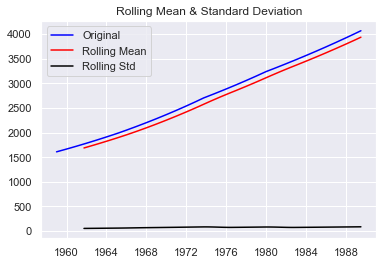

Results of Dickey-Fuller Test:
Test Statistic                   1.274320
p-value                          0.996461
#Lags Used                       1.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____ulc____


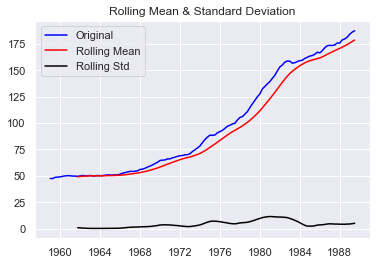

Results of Dickey-Fuller Test:
Test Statistic                   1.396716
p-value                          0.997099
#Lags Used                       2.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdfco____


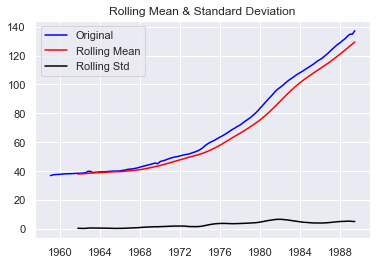

Results of Dickey-Fuller Test:
Test Statistic                   0.576191
p-value                          0.987014
#Lags Used                       5.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdf____


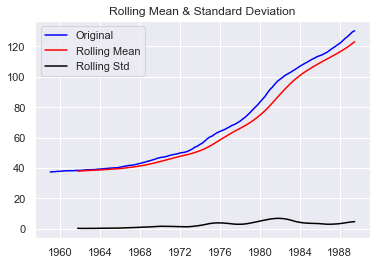

Results of Dickey-Fuller Test:
Test Statistic                   1.112860
p-value                          0.995325
#Lags Used                       7.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdfim____


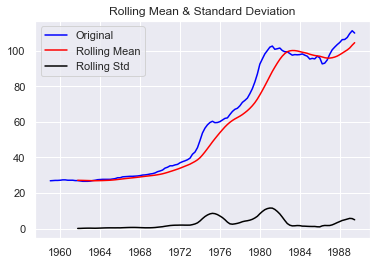

Results of Dickey-Fuller Test:
Test Statistic                  -0.198720
p-value                          0.938674
#Lags Used                       1.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdfcf____


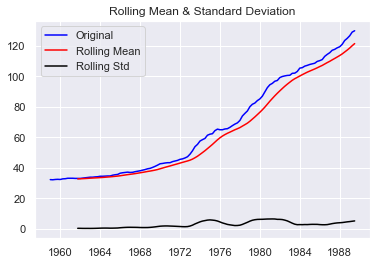

Results of Dickey-Fuller Test:
Test Statistic                   1.669255
p-value                          0.998051
#Lags Used                       9.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdfce____


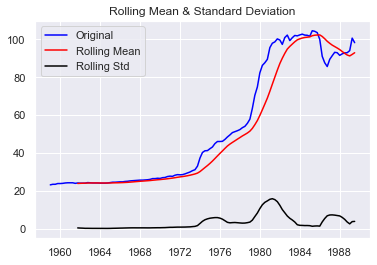

Results of Dickey-Fuller Test:
Test Statistic                  -0.815918
p-value                          0.814402
#Lags Used                      13.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary




In [4]:
from statsmodels.tsa.stattools import adfuller

#2 Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite)

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

for c in df.columns:
    print('-------------------------')
    print(F'____{c}____')
    test=test_stationarity(df[c])
    print(test)
    if test['p-value']<0.05:
        print('Rejecting Null Hypothesis--->Stationary')
    else:
        print('Fail to reject Null Hypothesis--->Non-Stationary')
        
    print('\n')


# result 1.2

None of the columns are stationary so we have to make them stationary

we will have to make them stationary if we want to fit a VAR 


-------------------------
____rgnp____


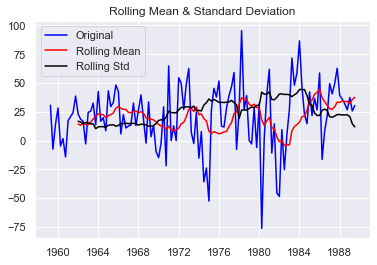

Results of Dickey-Fuller Test:
Test Statistic                  -5.427594
p-value                          0.000003
#Lags Used                       1.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____pgnp____


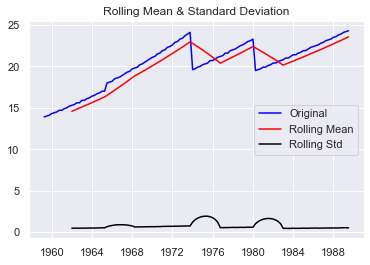

Results of Dickey-Fuller Test:
Test Statistic                  -1.758967
p-value                          0.401015
#Lags Used                       0.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____ulc____


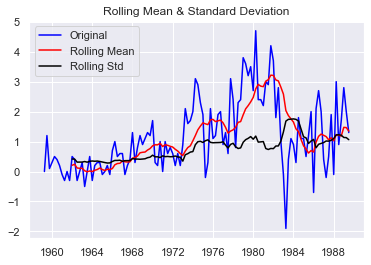

Results of Dickey-Fuller Test:
Test Statistic                  -3.576080
p-value                          0.006235
#Lags Used                       1.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdfco____


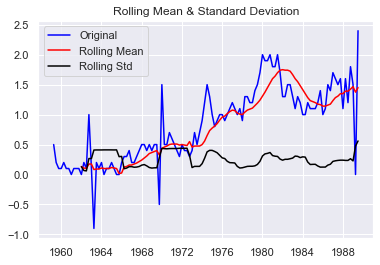

Results of Dickey-Fuller Test:
Test Statistic                  -1.092954
p-value                          0.717874
#Lags Used                       4.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdf____


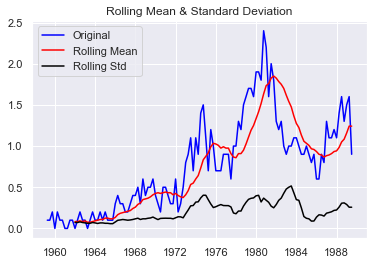

Results of Dickey-Fuller Test:
Test Statistic                  -1.399803
p-value                          0.582370
#Lags Used                      12.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdfim____


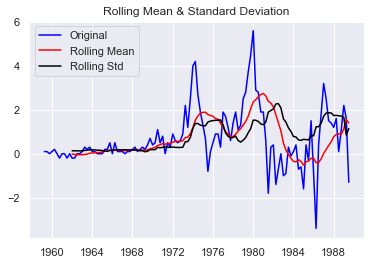

Results of Dickey-Fuller Test:
Test Statistic                  -4.244421
p-value                          0.000554
#Lags Used                       0.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdfcf____


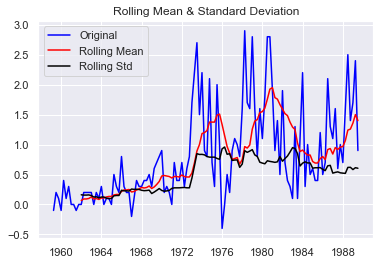

Results of Dickey-Fuller Test:
Test Statistic                  -1.823666
p-value                          0.368777
#Lags Used                       6.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary


-------------------------
____gdfce____


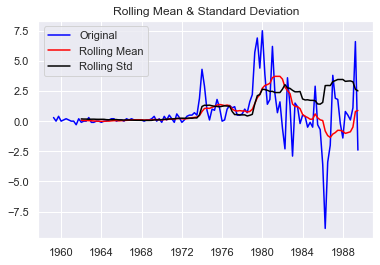

Results of Dickey-Fuller Test:
Test Statistic                  -2.044710
p-value                          0.267320
#Lags Used                      12.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Fail to reject Null Hypothesis--->Non-Stationary




In [5]:
data = (df).diff().dropna()


for c in df.columns:
    print('-------------------------')
    print(F'____{c}____')
    test=test_stationarity(data[c])
    print(test)
    if test['p-value']<0.05:
        print('Rejecting Null Hypothesis--->Stationary')
    else:
        print('Fail to reject Null Hypothesis--->Non-Stationary')
        
    print('\n')

In [6]:
data

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-04-01,30.6,13.9,0.0,0.5,0.1,0.1,-0.1,0.3
1959-07-01,-7.5,14.0,1.2,0.2,0.1,0.1,0.2,0.0
1959-10-01,13.9,14.1,0.1,0.1,0.2,0.0,0.1,0.4
1960-01-01,28.2,14.3,0.3,0.1,0.0,0.1,-0.1,0.0
1960-04-01,-4.8,14.4,0.5,0.2,0.2,0.2,0.4,0.1
...,...,...,...,...,...,...,...,...
1988-07-01,32.0,23.8,0.9,1.2,1.6,0.1,2.5,0.5
1988-10-01,26.7,23.9,1.7,1.8,1.3,1.1,1.4,0.1
1989-01-01,37.4,24.1,2.8,1.5,1.5,2.2,1.7,1.1


-------------------------
____rgnp____


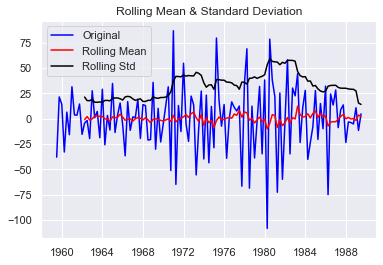

Results of Dickey-Fuller Test:
Test Statistic                -9.164075e+00
p-value                        2.487857e-15
#Lags Used                     2.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____pgnp____


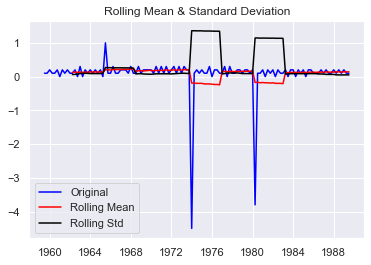

Results of Dickey-Fuller Test:
Test Statistic                -1.117242e+01
p-value                        2.620478e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____ulc____


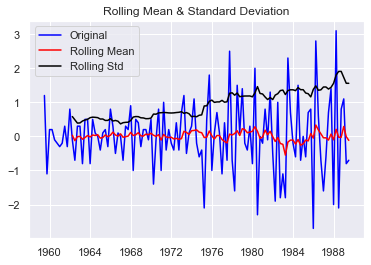

Results of Dickey-Fuller Test:
Test Statistic                -8.838020e+00
p-value                        1.698194e-14
#Lags Used                     2.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdfco____


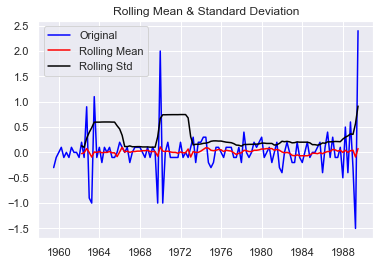

Results of Dickey-Fuller Test:
Test Statistic                -8.772473e+00
p-value                        2.499435e-14
#Lags Used                     3.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdf____


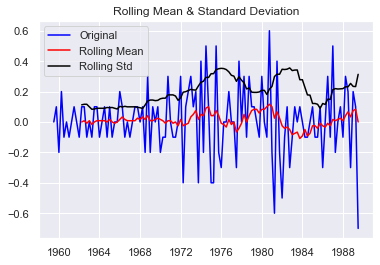

Results of Dickey-Fuller Test:
Test Statistic                  -4.328077
p-value                          0.000397
#Lags Used                      11.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdfim____


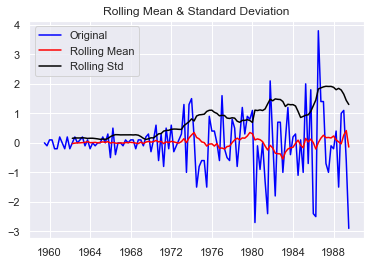

Results of Dickey-Fuller Test:
Test Statistic                -9.558090e+00
p-value                        2.467724e-16
#Lags Used                     1.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdfcf____


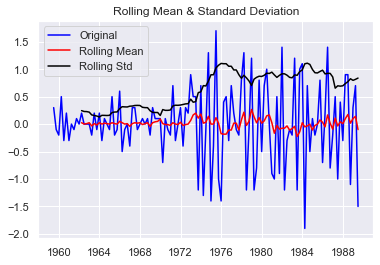

Results of Dickey-Fuller Test:
Test Statistic                -7.218639e+00
p-value                        2.140072e-10
#Lags Used                     5.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64
Rejecting Null Hypothesis--->Stationary


-------------------------
____gdfce____


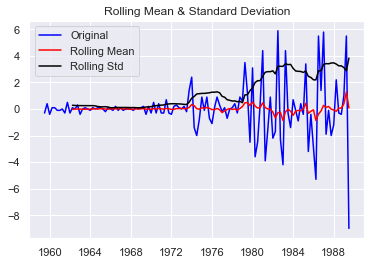

Results of Dickey-Fuller Test:
Test Statistic                  -4.375380
p-value                          0.000328
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
Rejecting Null Hypothesis--->Stationary




In [7]:
data = (data).diff().dropna()


for c in df.columns:
    print('-------------------------')
    print(F'____{c}____')
    test=test_stationarity(data[c])
    print(test)
    if test['p-value']<0.05:
        print('Rejecting Null Hypothesis--->Stationary')
    else:
        print('Fail to reject Null Hypothesis--->Non-Stationary')
    print('\n')

## Second Differencing makes all the columns stationary so we can now use VAR


C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


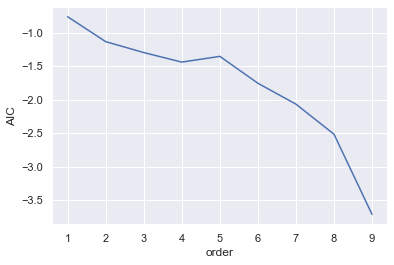

In [8]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

aic_list=[]
order=np.arange(1,10)
model = VAR(data)
for p in order:
    results = model.fit(p)
    aic_list.append(results.aic)
aic_list=np.array(aic_list)
plt.xlabel('order')
plt.ylabel('AIC')
plt.plot(order,aic_list)


## I'm going to choose 4 since it is a local minimum , more than thay would be overfitting 

In [9]:
data_2=data.iloc[-4:]
df_train=df.iloc[:-4]

In [10]:
data

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-07-01,-38.1,0.1,1.2,-3.000000e-01,0.0,0.0,0.3,-0.3
1959-10-01,21.4,0.1,-1.1,-1.000000e-01,0.1,-0.1,-0.1,0.4
1960-01-01,14.3,0.2,0.2,-7.105427e-15,-0.2,0.1,-0.2,-0.4
1960-04-01,-33.0,0.1,0.2,1.000000e-01,0.2,0.1,0.5,0.1
1960-07-01,6.4,0.1,-0.1,-1.000000e-01,-0.1,-0.2,-0.3,0.1
...,...,...,...,...,...,...,...,...
1988-07-01,-3.9,0.2,-2.1,-4.000000e-01,0.2,-1.5,0.9,-0.3
1988-10-01,-5.3,0.1,0.8,6.000000e-01,-0.3,1.0,-1.1,-0.4
1989-01-01,10.7,0.2,1.1,-3.000000e-01,0.2,1.1,0.3,1.0


In [11]:
model = VAR(data.iloc[0:-4])
results = model.fit(4)

fc = results.forecast(y=data_2.values, steps=4)
df_forecast = pd.DataFrame(fc, index=data.index[-4:], columns=data.columns + '_2d')
df_forecast

C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1988-10-01,1.887297,0.101110,-0.593051,-1.045417,0.275116,-0.274395,0.187943,-0.726834
1989-01-01,30.635705,0.156944,0.271075,-0.326881,-0.517742,1.991519,0.478743,1.383586
1989-04-01,-74.812421,-0.434298,0.776689,-0.099626,-0.006359,-1.391813,-0.914733,-1.826998
1989-07-01,114.454333,0.563440,-1.509010,0.203129,0.432084,-0.046913,1.343137,1.493540


## we have to reverse the second diff

In [12]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

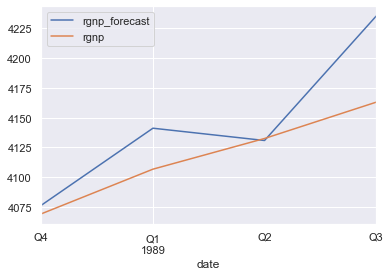

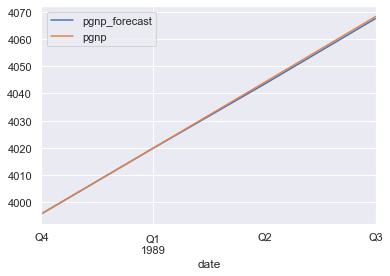

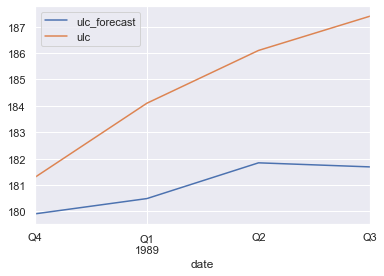

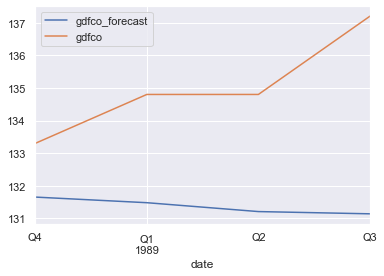

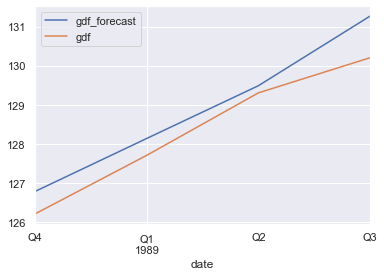

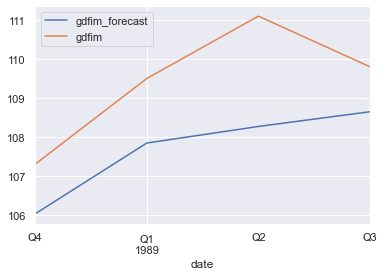

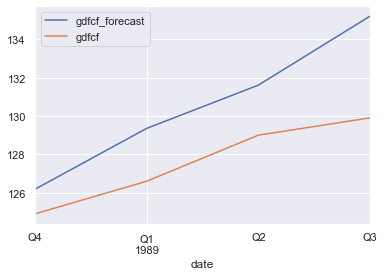

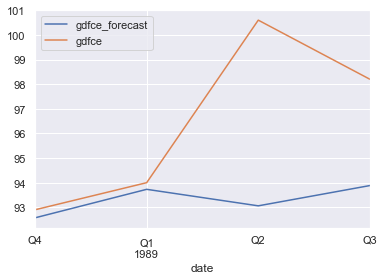

In [13]:
df_forcast = invert_transformation(df_train, df_forecast, second_diff=True)       

fc_columns=df.columns+'_forecast'
df_cols=df.columns

for i in range(len(df_cols)):
    fig, ax=plt.subplots()
    df_forcast[fc_columns[i]].plot(ax=ax,legend=True,label=fc_columns[i])
    df[df_cols[i]].loc[df_forcast.index.values].plot(ax=ax,legend=True)



# 2. Gun Violence Panel

The [Gun Violence](https://www.kaggle.com/jameslko/gun-violence-data) dataset

1. Transform it into an amenable panel (or structure of multiple time series) to analyze and create a forecast for the next year outside the sample in **Chicago**, **Washington** and **New Orleans**, and the US as a whole.

2. Are there other (non time series) predictors which could be used in this dataset to help predict severity or number of shootings in the future? Analyze the data for feature importance and explain your findings.

In [14]:
df=pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv')


#df=df.groupby(["date", "city_or_county"]).sum()
df["date"] = pd.to_datetime(df.date)

df['gun_victim']=df.n_killed+df.n_injured
df.gun_victim=df.gun_victim.astype(float)
df=df[['gun_victim','city_or_county','date']]
df=df.set_index('date')
#df=df.groupby(pd.Grouper(freq="M")).sum()
L=['Chicago', 'Washington', 'New Orleans','all_us']
Dict={}
for e in L:
    if e!='all_us':
        Dict[e]=df.loc[df.city_or_county==e]
        Dict[e]=Dict[e].groupby(pd.Grouper(freq="M")).sum()


    else:
        df.city_or_county='all_us'
        Dict[e]=df.groupby(pd.Grouper(freq="M")).sum()





C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmod

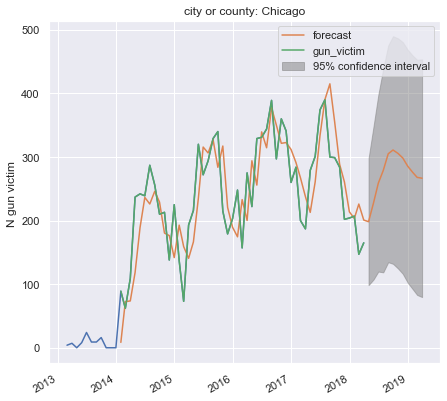

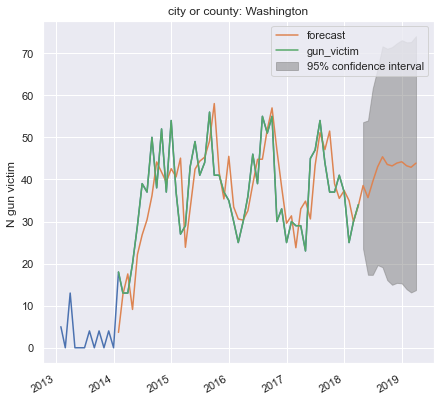

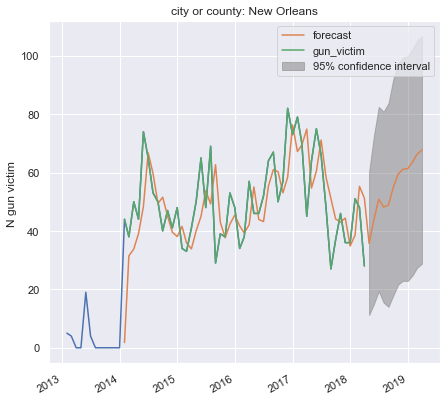

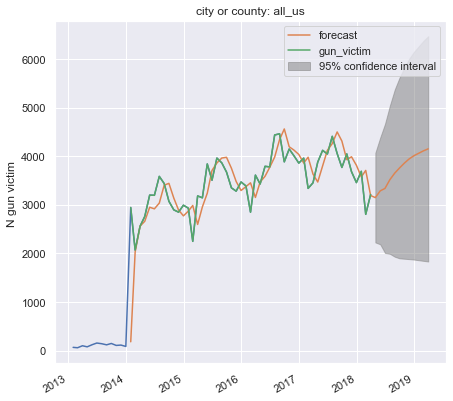

In [31]:
from statsmodels.tsa.arima_model import ARIMA

for N in range(len(L)):
    model = ARIMA(Dict[L[N]], order=(6,1,1))
    res = model.fit(disp=-1)


    data=Dict[L[N]]

    fig, ax = plt.subplots(figsize=(7,7))
    ax.plot(data.index,data.gun_victim)
    ax.set_title(F'city or county: {L[N]}')
    ax.set_ylabel('N gun victim ')
    #res.plot_predict('1882', '2017', ax=ax)
    res.plot_predict('2014','2019-03-21', ax=ax)
    plt.plot()

# #2.2

In [38]:
df=pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv')

In [45]:
display(df.columns)

#I would normaly do some test to see if any of those columns  Granger cause each other or maybe see the correlation, but I'm not really sure. 
#But the location of the shooting may have an effect on the number of victims (latitude,longitude)

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')